#NEPTUN : X3FEMO | FULL-NAME : AMINE BAKHTAOUI

import our dataset from Google drive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Specified the exact folder

In [2]:
ROOT_DIR = '/content/gdrive/MyDrive/jaguar.v1i.yolov8'

Download the ultralytics

In [3]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 7.3 MB/s eta 0:00:00


Show some images from our training folder

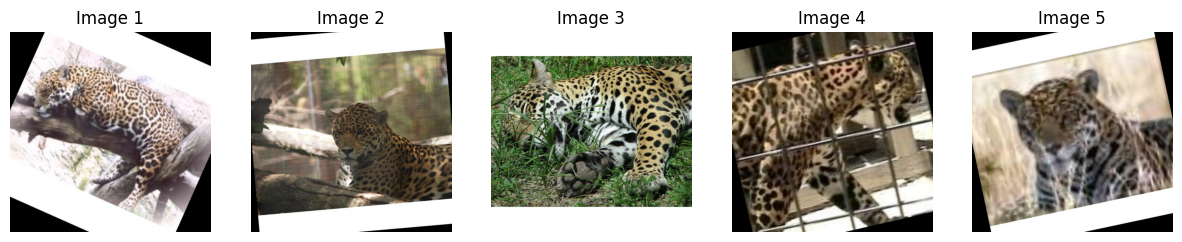

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path to the training images folder
train_folder = '/content/gdrive/MyDrive/jaguar.v1i.yolov8/train/images'

# Get a list of image files in the training folder
image_files = [f for f in os.listdir(train_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Display a few images from the training folder
num_images_to_display = min(5, len(image_files))

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    # Load and display the image
    image_path = os.path.join(train_folder, image_files[i])
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.show()


Training our Model

In [5]:
from ultralytics import YOLO

# Path to The  directory
ROOT_DIR = '/content/gdrive/MyDrive/jaguar.v1i.yolov8'

# Load a model
model = YOLO("yolov8m.yaml")

# Train the model
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=50, batch=16, imgsz=640 , save=True)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 96.6MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/jaguar.v1i.yolov8/train/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/jaguar.v1i.yolov8/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.85G      3.129      3.274      4.199         45        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all         20         20      0.003        0.9     0.0145    0.00558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.05G      3.111       3.05      4.042         43        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         20         20      0.003        0.9     0.0375     0.0153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       7.1G      2.887      2.871      3.877         31        640: 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         20         20     0.0393       0.75      0.142     0.0492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.06G      2.895      2.834      3.716         38        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         20         20     0.0274       0.75     0.0283    0.00948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.06G      2.778      2.775      3.572         51        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         20         20     0.0366        0.7     0.0488     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.06G        2.7      2.798      3.424         47        640: 100%|██████████| 15/15 [00:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         20         20     0.0467        0.3     0.0447     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.08G      2.596      2.722      3.281         38        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         20         20     0.0467        0.3     0.0447     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.11G      2.523      2.652       3.16         46        640: 100%|██████████| 15/15 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         20         20     0.0467        0.3     0.0447     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.06G       2.46      2.551      3.122         41        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         20         20     0.0467        0.3     0.0447     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.09G      2.385      2.543      3.059         38        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         20         20     0.0467        0.3     0.0447     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       7.1G      2.448      2.488      3.052         42        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         20         20     0.0358       0.05     0.0183    0.00217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.09G      2.305      2.377      2.967         44        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         20         20     0.0358       0.05     0.0183    0.00217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.06G      2.314      2.325      2.917         37        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         20         20   0.000172       0.05    8.8e-05    8.8e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.09G      2.255      2.296      2.965         50        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         20         20      0.381        0.5      0.413      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.11G      2.219      2.264      2.924         46        640: 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         20         20      0.421      0.691      0.382        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.09G      2.231       2.32      2.818         46        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20         20     0.0107       0.25    0.00832    0.00294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.07G      2.128      2.137       2.78         36        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         20         20     0.0107       0.25    0.00832    0.00294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.09G      2.073      2.093        2.8         37        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         20         20      0.435        0.5      0.406      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       7.1G      2.088      2.041      2.723         32        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         20         20     0.0127       0.65     0.0267    0.00921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.11G      2.015       2.08      2.673         37        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         20         20      0.322      0.547      0.292      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.06G      1.976      1.923      2.628         46        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         20         20      0.487      0.522      0.468      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.09G       2.01      1.988      2.666         44        640: 100%|██████████| 15/15 [00:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         20         20      0.341        0.5      0.277      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.11G      1.937      1.939      2.554         38        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20         20        0.4        0.5       0.34      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.11G      1.879      1.819       2.53         43        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         20         20      0.409        0.6      0.445      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.06G      1.968      1.839       2.59         46        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         20         20      0.648        0.5      0.456      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       7.1G      1.845      1.709      2.518         43        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         20         20      0.369       0.41      0.271        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       7.1G      1.789      1.695      2.457         51        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         20         20      0.457       0.65      0.434      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.11G      1.772      1.722      2.465         41        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         20         20      0.655        0.6       0.52       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.06G      1.731      1.652      2.385         37        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20         20      0.568        0.6      0.529      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.09G      1.649      1.604      2.349         40        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         20         20      0.606        0.6      0.542      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       7.1G      1.679      1.562      2.352         52        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         20         20      0.569        0.6      0.597      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       7.1G      1.654      1.579      2.344         39        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         20         20      0.747       0.55      0.563      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.06G      1.607      1.504      2.281         45        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         20         20      0.577       0.45      0.438      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.09G      1.592      1.547      2.315         45        640: 100%|██████████| 15/15 [00:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         20         20      0.842        0.5      0.596      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.09G      1.583      1.535      2.274         44        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         20         20       0.66      0.485      0.496      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.11G      1.585      1.463       2.29         34        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         20         20       0.93        0.5      0.624        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.05G      1.589      1.462      2.264         40        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         20         20      0.732      0.684      0.706      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.08G      1.592      1.463      2.242         44        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         20         20      0.779      0.707      0.746      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.93G       1.54      1.425      2.238         40        640: 100%|██████████| 15/15 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         20         20      0.645        0.6      0.604       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.11G      1.493      1.387        2.2         50        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         20         20      0.532       0.55      0.478      0.264


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.06G      1.487      1.546       2.36         16        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         20         20      0.513        0.6      0.536      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.09G      1.393      1.191      2.322         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         20         20       0.66        0.6      0.609      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.09G      1.399      1.087      2.283         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         20         20      0.612        0.7      0.668      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.94G      1.375      1.002      2.322         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         20         20      0.794        0.8      0.767      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.06G      1.344     0.9186      2.197         16        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         20         20      0.934        0.9      0.923      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       7.1G      1.267     0.8935       2.15         16        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         20         20      0.881        0.9      0.889      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.11G      1.261     0.9235      2.127         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         20         20      0.949       0.94      0.918      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.11G      1.227     0.8923      2.059         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         20         20      0.933        0.9      0.922      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.06G      1.228     0.8434      2.087         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         20         20      0.895      0.849      0.878      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       7.1G      1.242     0.8978      2.125         16        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         20         20      0.807      0.837      0.876      0.373



50 epochs completed in 0.142 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


                   all         20         20      0.949      0.939      0.918       0.46
Speed: 0.2ms preprocess, 9.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


Show some predicted images

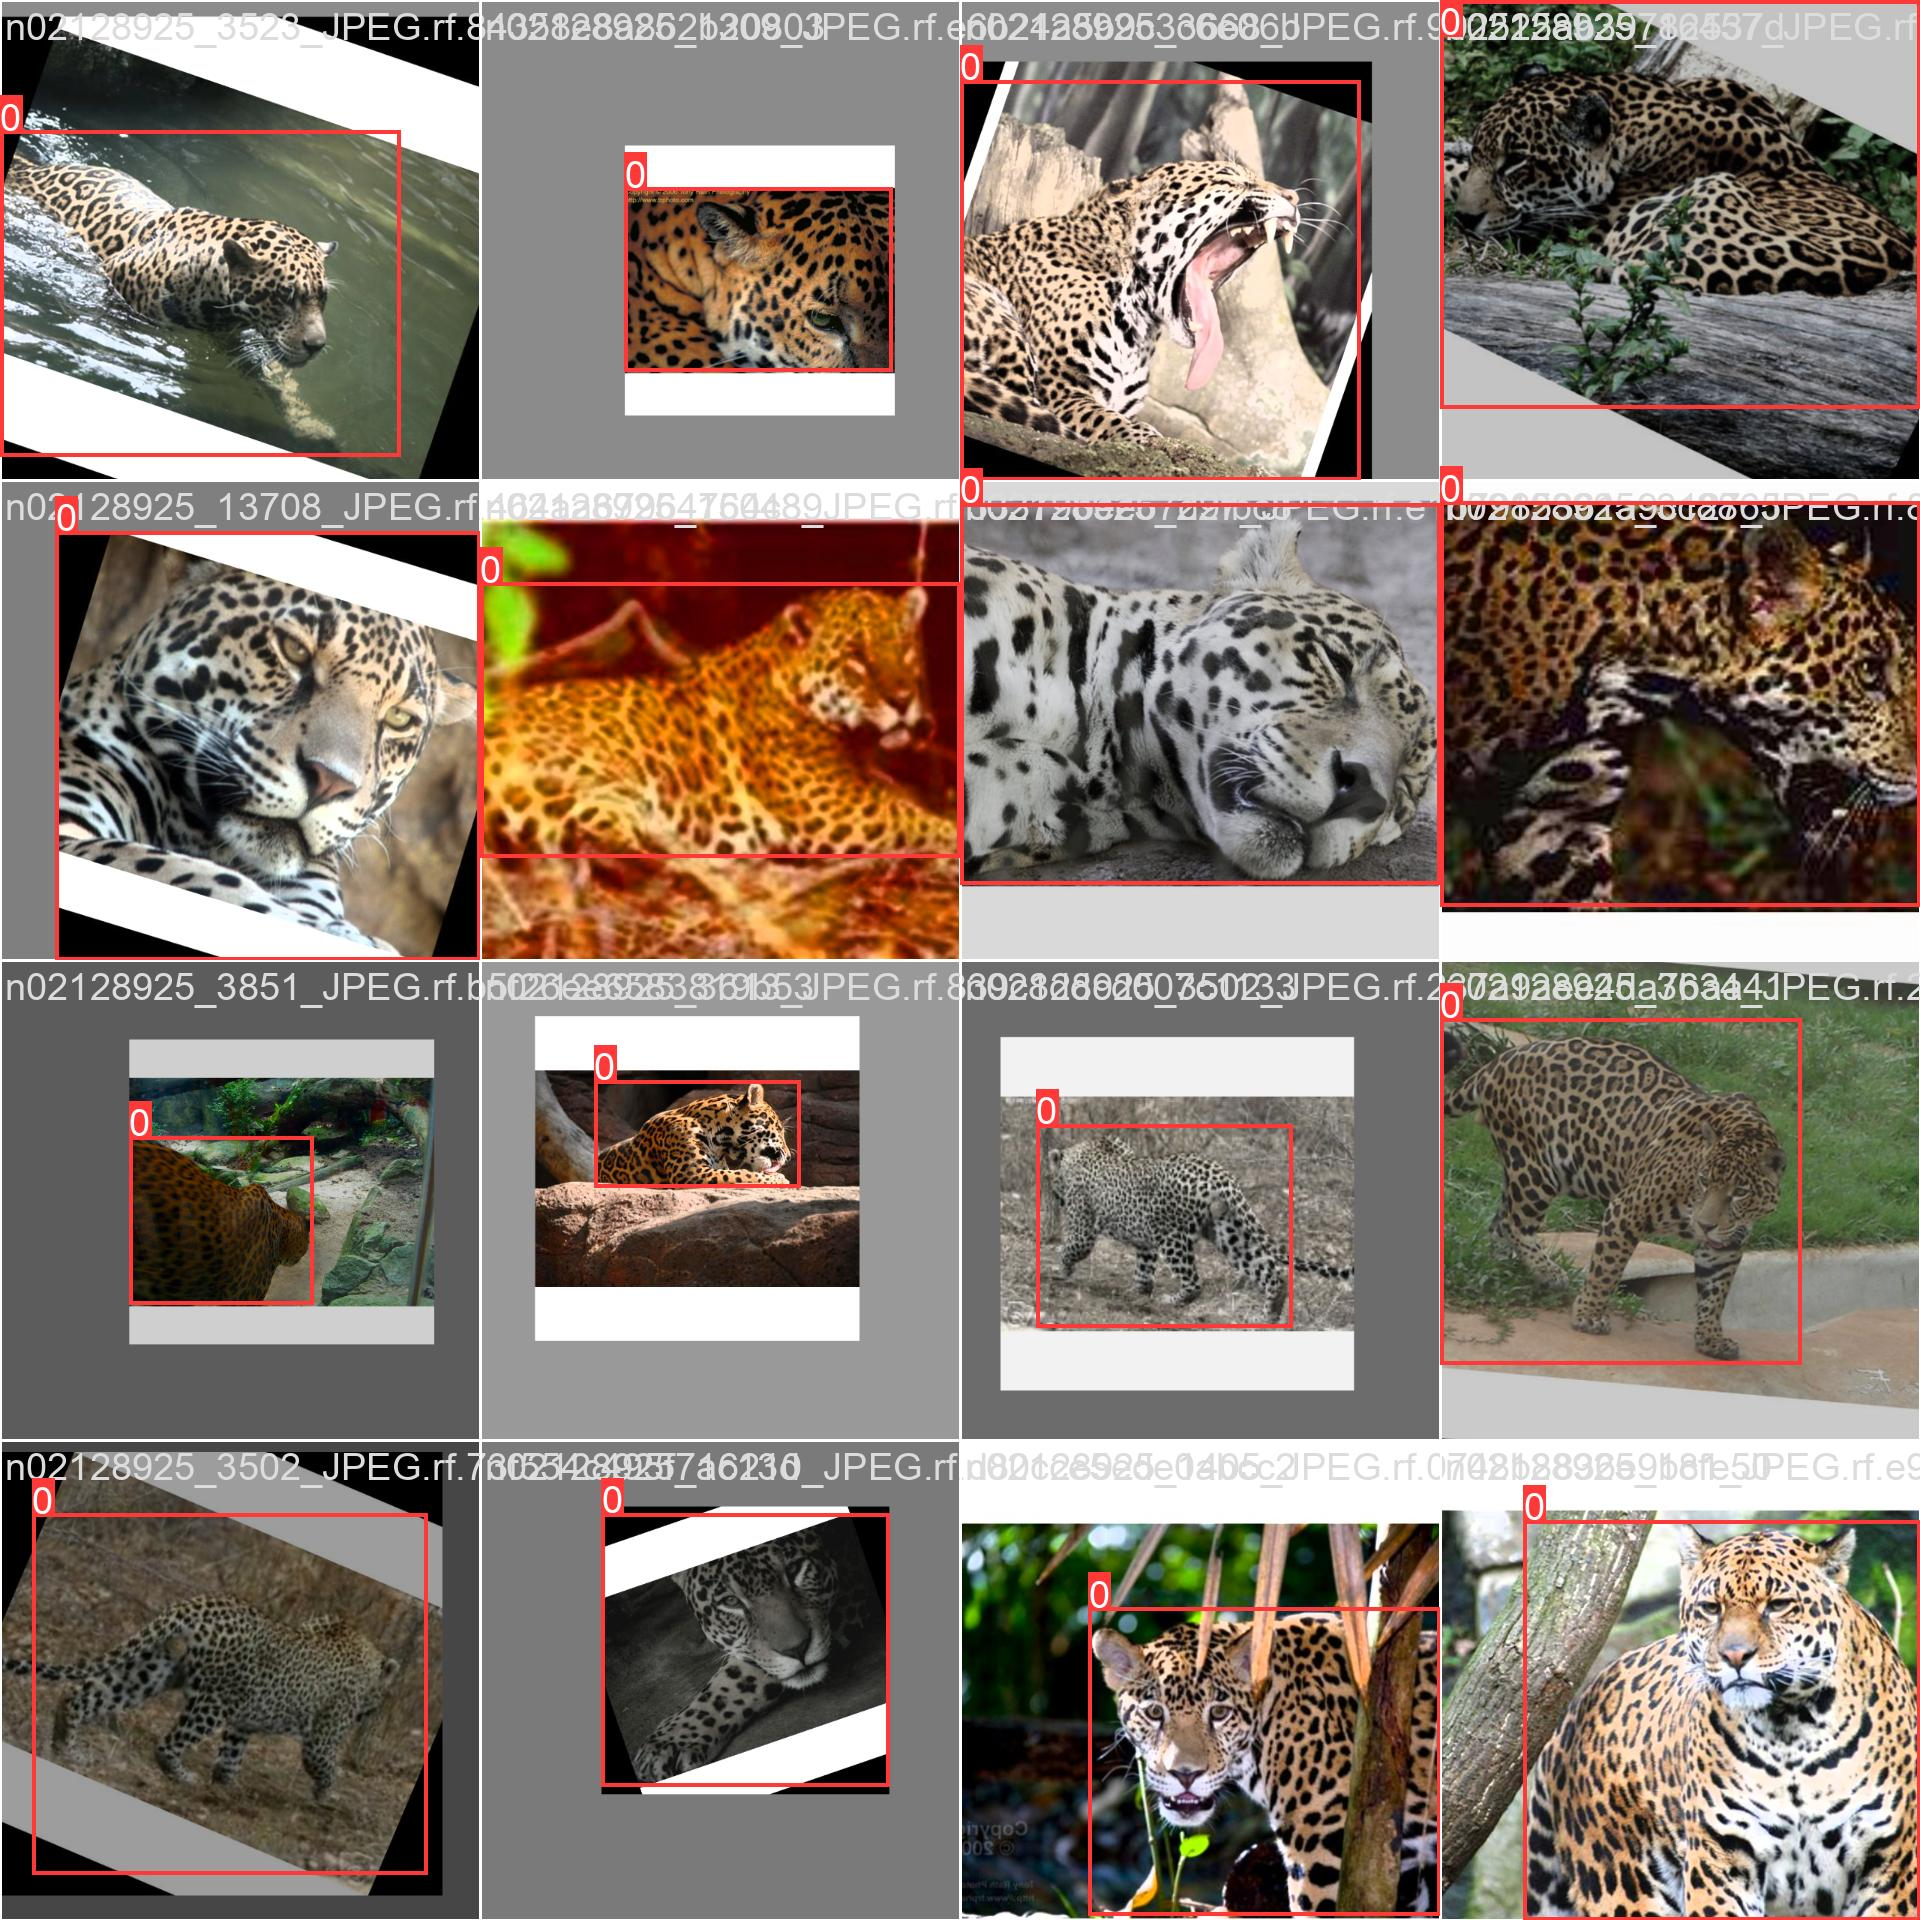

In [11]:
from PIL import Image
from IPython.display import display

# Specify the path to the image file
image_path = '/content/runs/detect/train/train_batch600.jpg'

# Open the image file
image = Image.open(image_path)

# Display the image
display(image)


Show the importants plot

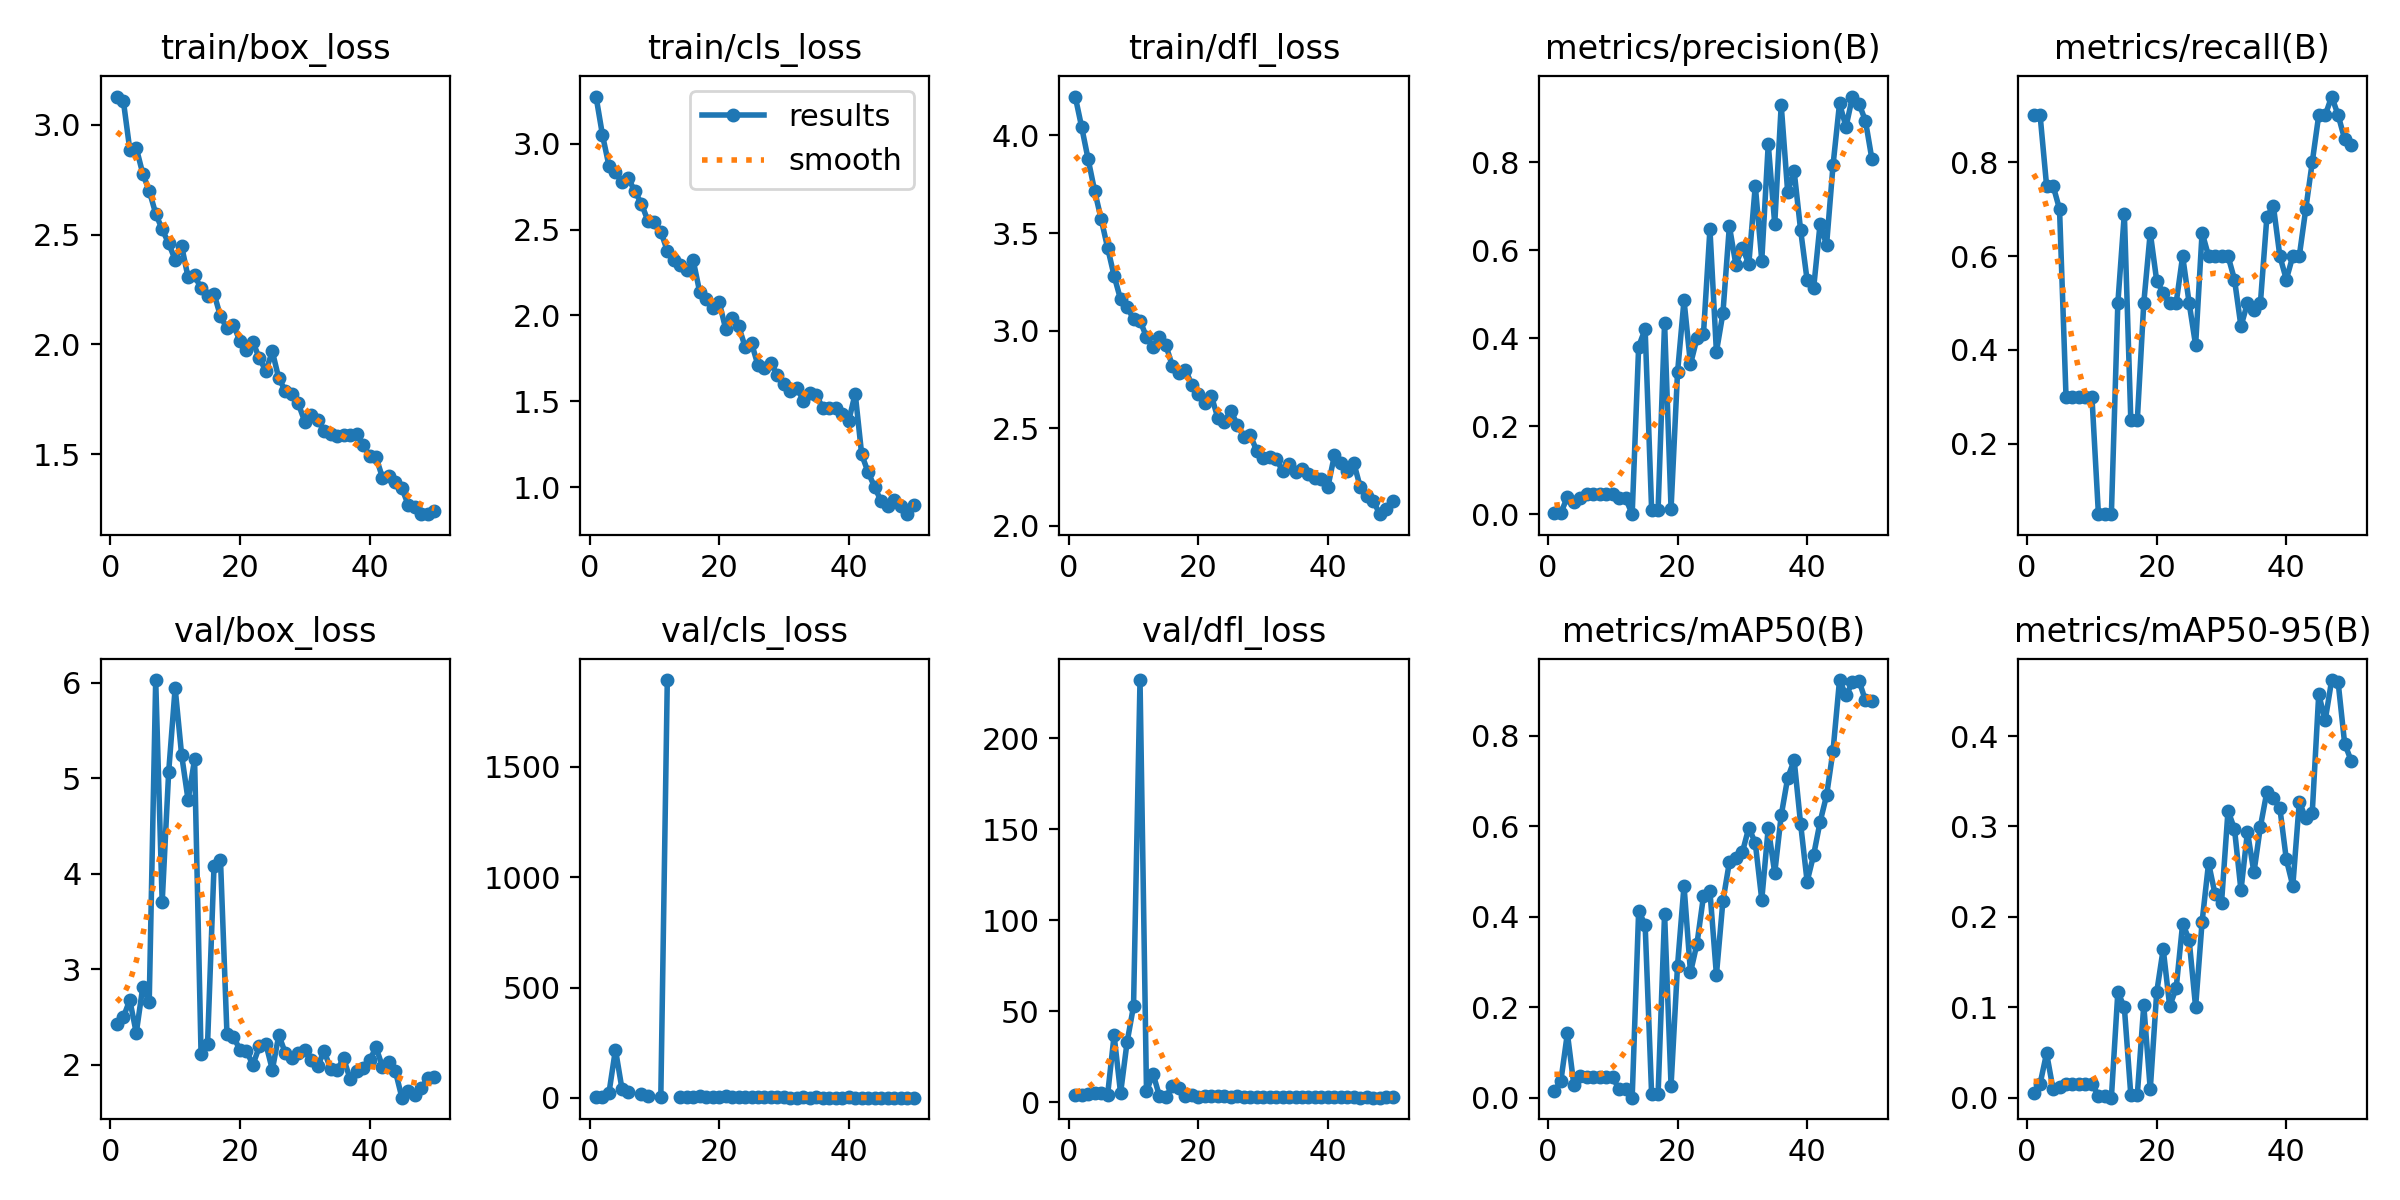

In [12]:
from PIL import Image
from IPython.display import display

# Specify the path to the image file
image_path = '/content/runs/detect/train/results.png'

# Open the image file
image = Image.open(image_path)

# Display the image
display(image)


The Confusion Matrix

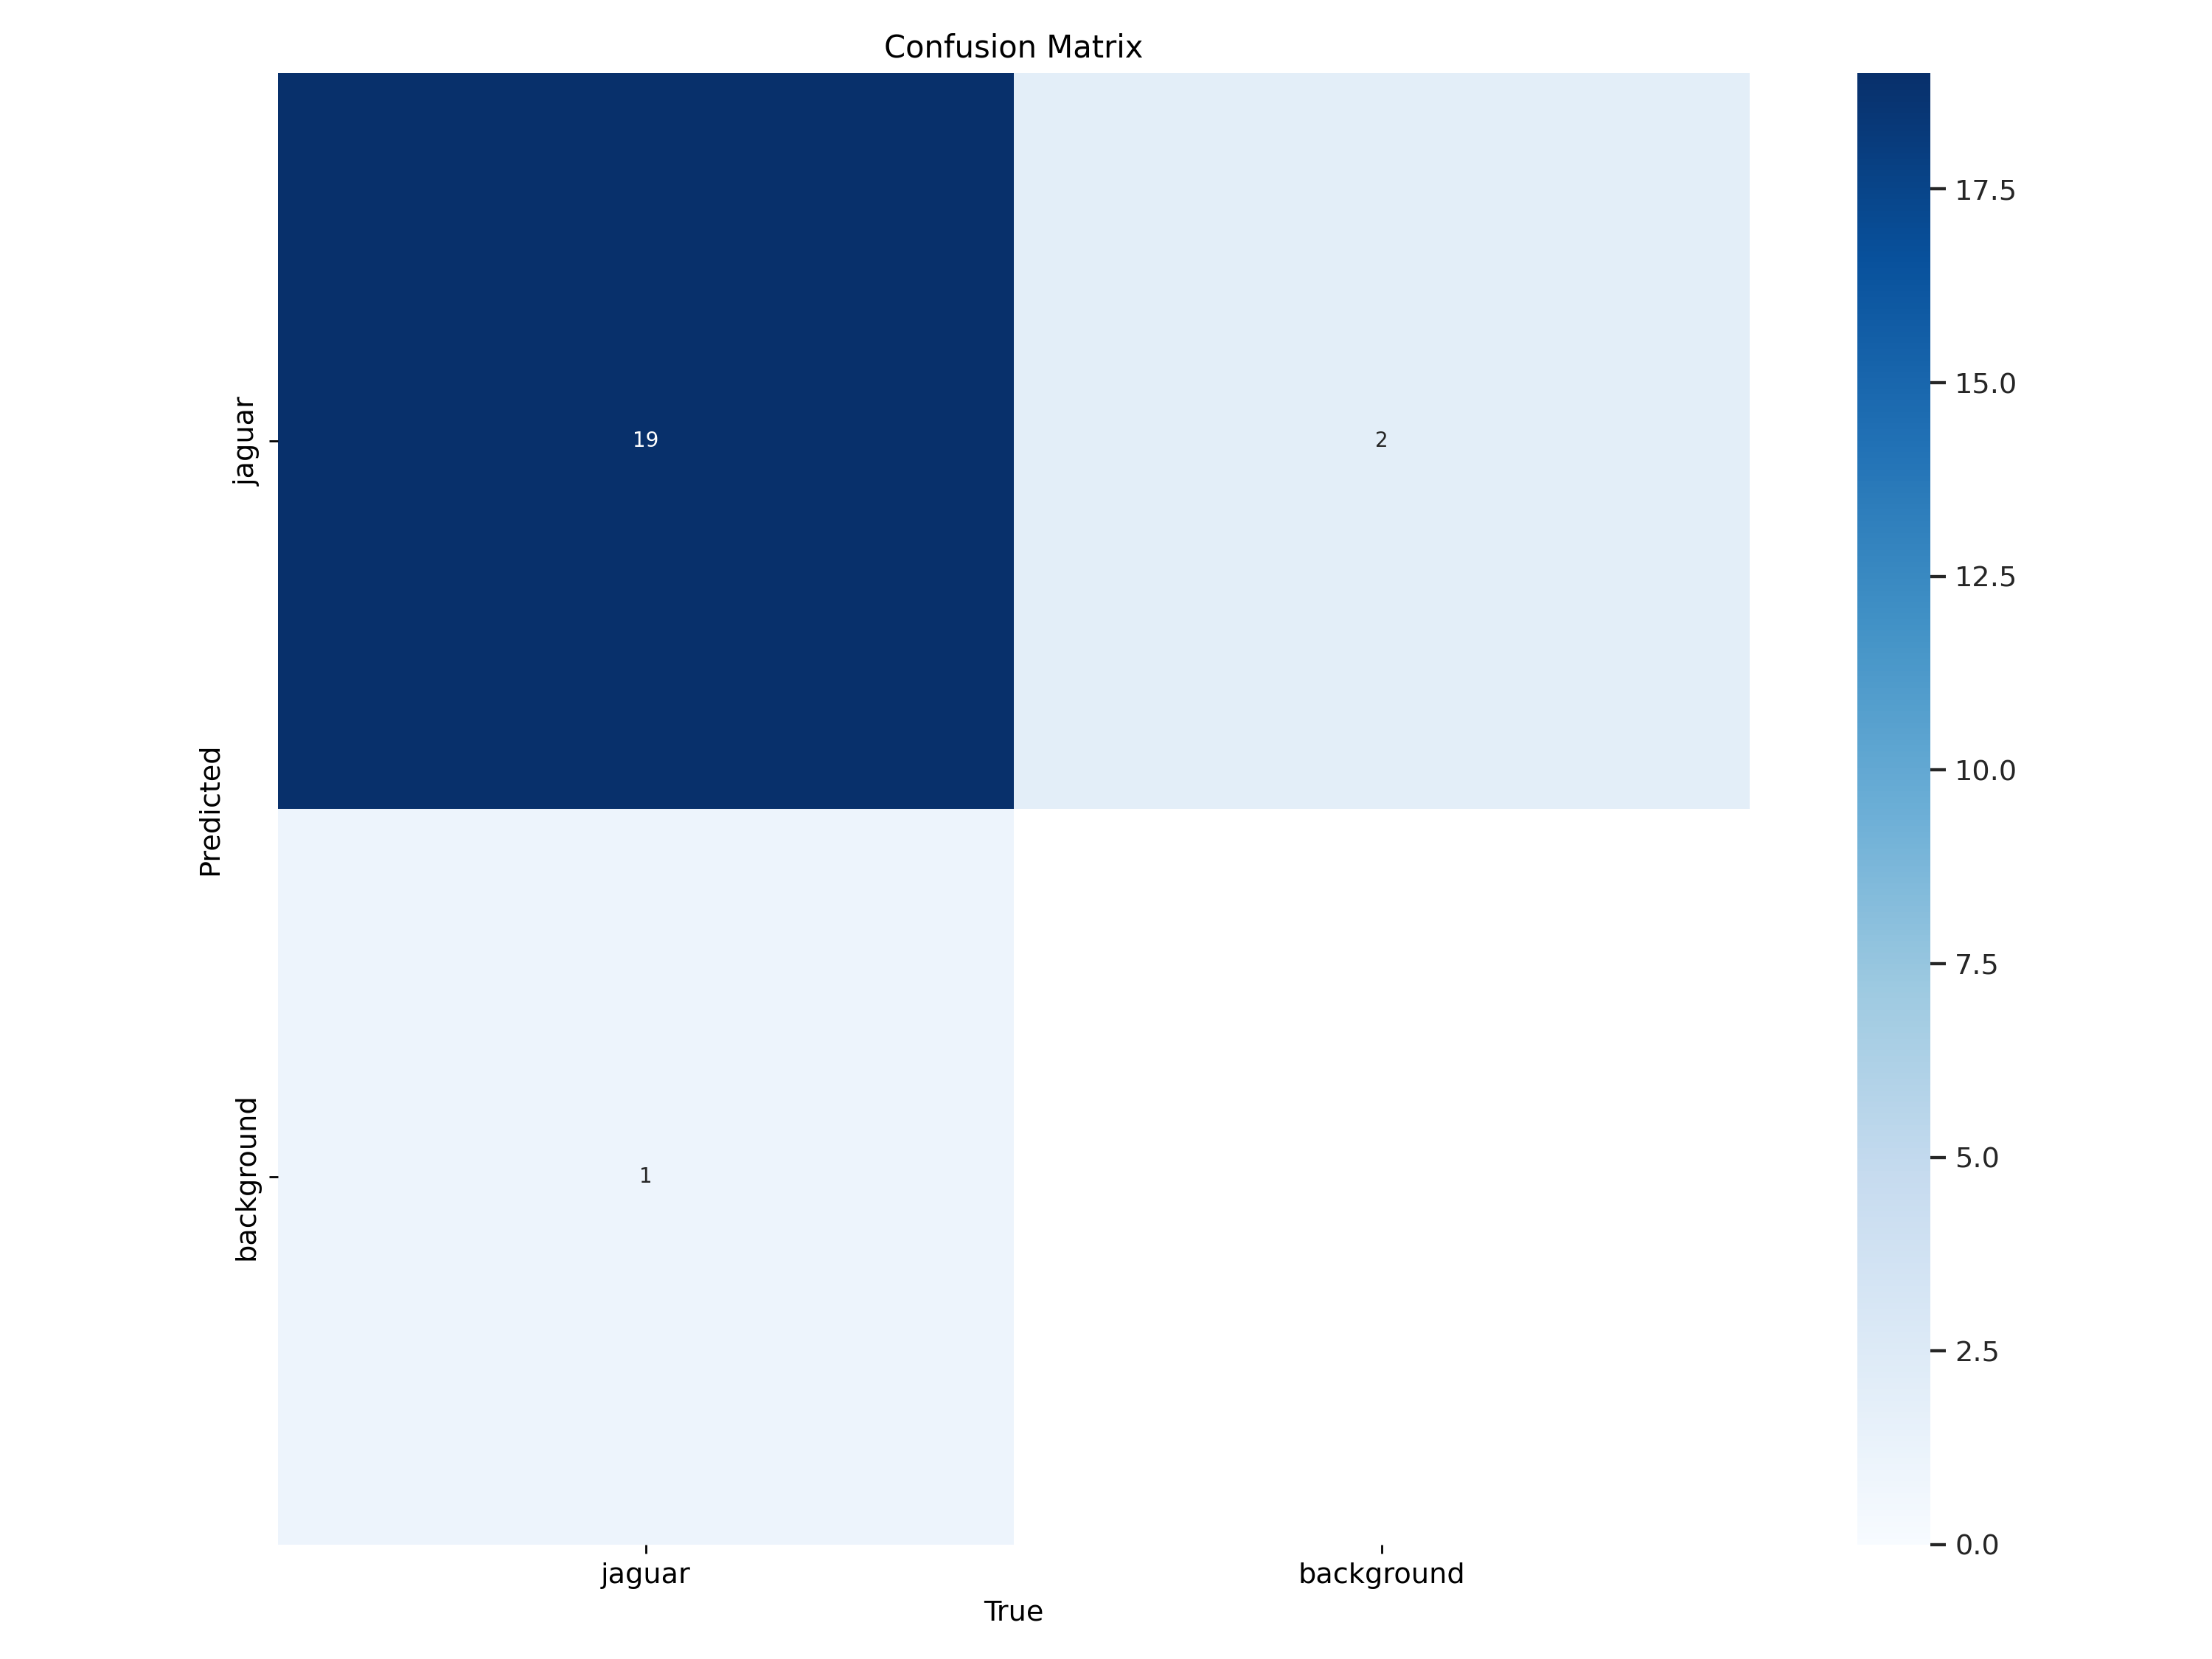

In [13]:
from PIL import Image
from IPython.display import display

# Specify the path to the image file
image_path = '/content/runs/detect/train/confusion_matrix.png'

# Open the image file
image = Image.open(image_path)

# Display the image
display(image)


Show Some images from our validation folder

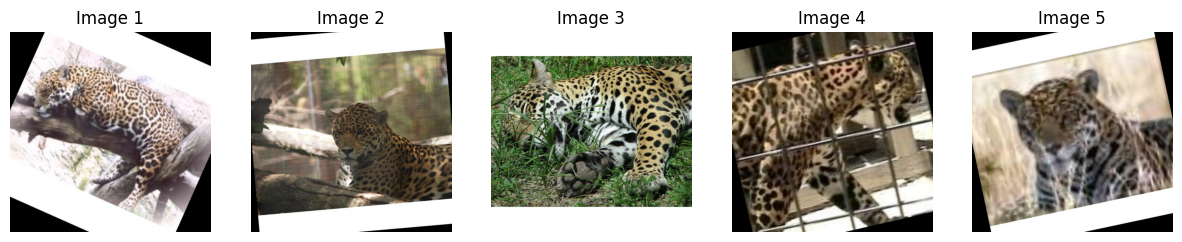

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path to the validation images folder
validation_folder = '/content/gdrive/MyDrive/jaguar.v1i.yolov8/valid/images'

# Get a list of image files in the validation folder
image_files = [f for f in os.listdir(train_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Display a few images from the validation folder
num_images_to_display = min(5, len(image_files))

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    # Load and display the image
    image_path = os.path.join(train_folder, image_files[i])
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.show()


Evaluate the model on the validation set

In [15]:
results = model.val(data=os.path.join(ROOT_DIR, "data.yaml"))

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/gdrive/MyDrive/jaguar.v1i.yolov8/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


                   all         20         20      0.949       0.94      0.918      0.463
Speed: 0.3ms preprocess, 46.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2


Evaluate the model on a test image


image 1/1 /content/gdrive/MyDrive/jaguar.v1i.yolov8/test_image.jpg: 448x640 1 jaguar, 80.6ms
Speed: 3.8ms preprocess, 80.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/train3


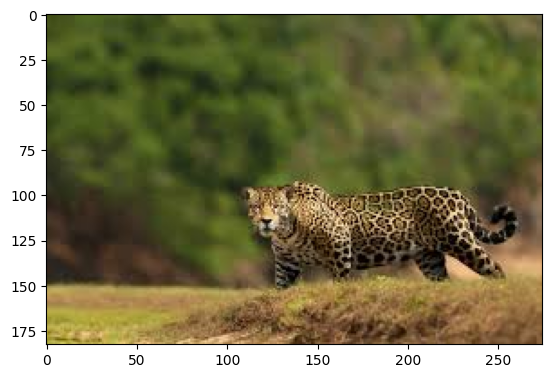

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Optionally, test the model on specific images
image_path = os.path.join(ROOT_DIR, "test_image.jpg")
results = model.predict(source=image_path,save = True)

# Load the image
image = Image.open(image_path)

# Create a figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)
